***Note: The example is discussed in detail by <cite data-cite="GawPan20X">(Gawthrop and Pan, 2020)</cite> available [here](https://arxiv.org/abs/2009.02217) and should be read in conjunction.***

***Note: this is the Redox.ipynb notebook. The
PDF version "Redox Reactions and Proton Pumps"
is available [here](Redox.pdf).***



# Introduction
Redox reactions and proton pumps play a fundamental role in Biology. This note illustrates this using a bond graph model of complex I of the mitochondrial electron transport chain.


In [1]:
## Some useful imports
import BondGraphTools as bgt
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Stoichiometric analysis
import stoich as st

## SVG
import svgBondGraph as sbg

## Display (eg disp.SVG(), disp.
import IPython.display as disp

## Potential data
import phiData

quiet = True


In /home/peterg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/peterg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/peterg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/peterg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/peterg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


# Redox reaction
A key energy-generating redox reaction that within the mitochondrial respiratory chain is
\begin{equation}\label{eq:NAD}
\ch{NADH + Q + H+ <>[ r ] NAD+ +  QH2 }
\end{equation}
This reaction can be divided into the half reactions:
\begin{align}
\ch{NADH &<>[ r1 ] 2 e1- + H+ + NAD+ }\label{eq:NAD_1}\\
\ch{2 e2- + 2 H+ + Q &<>[ r2 ] QH2}\label{eq:NAD_2}
\end{align}
A bond graph representation of this decomposition is given  below.

## Bond graph
C:E1 and C:E2 represent the electron potentials and the other The C components represent the species; the two Re components the two half reactions. 

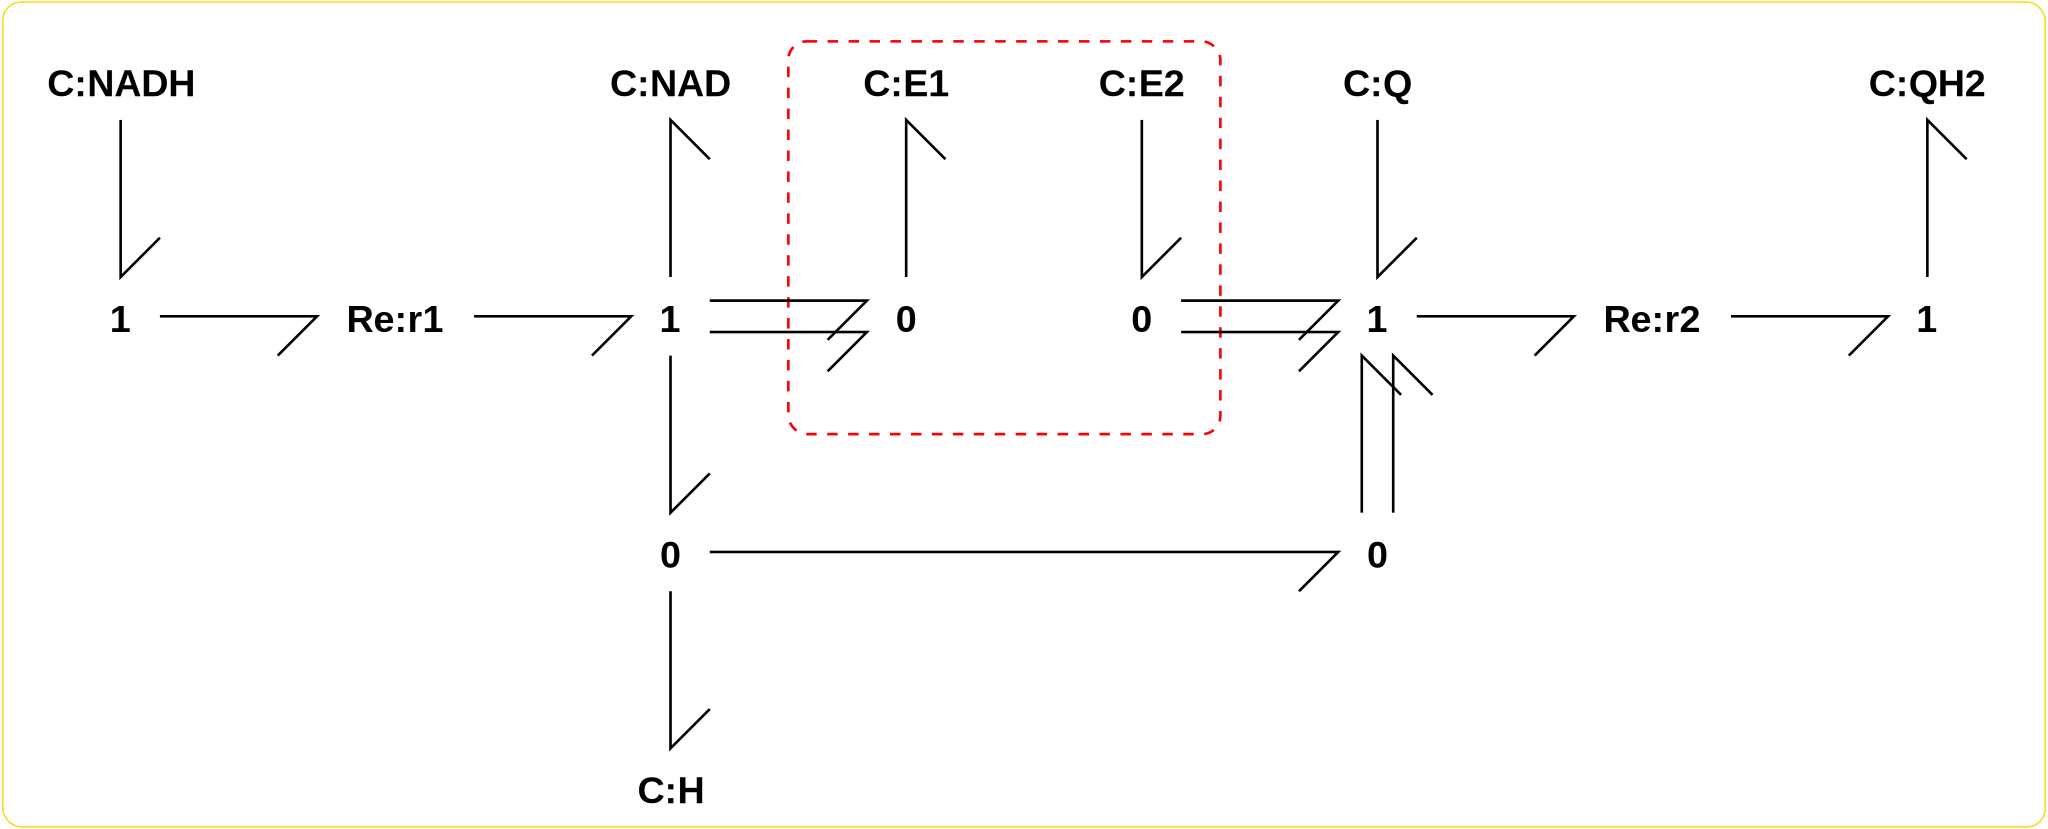

In [2]:
## Redox reaction
sbg.model('Redox_abg.svg')
import Redox_abg
disp.SVG('Redox_abg.svg')

## Stoichiometry

In [3]:
## Stoichiometry
linear = ['E1','E2']
s = st.stoich(Redox_abg.model(),linear=linear,quiet=quiet)
chemostats = ['NADH','NAD','Q','QH2','H']
sc = st.statify(s,chemostats=chemostats)


In [4]:
## Stoichiometric matrix
disp.Latex(st.sprintl(s,'N'))

<IPython.core.display.Latex object>

## Reactions
These are automatically generated from the bond graph

In [5]:
## Reactions
disp.Latex(st.sprintrl(s,chemformula=True,all=True))

<IPython.core.display.Latex object>

## Potentials
The reaction (Faraday Equivalent) potentials are computed from tables gleaned from the literature

In [6]:
## Standard potetials
phi_Std = phiData.phi_Std()

## Typical concentrations
conc = phiData.ParRubXu16_conc()

## From BazBeaVin16
conc['Q'] = conc['QH2'] = 1e-2

## pH 7
conc['H'] = 1e-7

## Table for paper and put values in to phi_NADH etc.
print('%% Table')
ch='\ch'
l='{'
r='}'
eol = r'\\'
phi_std = {}
for spec in ['NAD','NADH','Q','QH2','H']:
    phi0 = phi_Std[spec]
    con = conc[spec]
    phi_std_spec = phi0 + st.V_N()*np.log(con)
    phi_std[spec] = phi_std_spec
    #print(f'phi_Std_{spec} = {1000*phi0:0.0f}, phi_{spec} = {1000*phi_std[spec]:.0f}, conc_{spec}={conc[spec]}')
    print(f'{ch}{l}{spec}{r} & {1000*phi0:.0f} & {con:1.2e} & {1000*phi_std_spec:.0f}{eol}')
    exec(f'phi_{spec} = {phi_std_spec}')
  

## Print the worked example for the paper.
print('\n%% Equations')
E1 = 0.5*(phi_NADH - phi_NAD - phi_H)
E2 = 0.5*(phi_QH2 - phi_Q - 2*phi_H)
print(f'E1 = 0.5({1000*phi_NADH:.0f} - {1000*phi_NAD:.0f} - {1000*phi_H:.0f}) = {1000*E1:.0f} mV')
print(f'E2 = 0.5({1000*phi_QH2:.0f} - {1000*phi_Q:.0f} - 2x{1000*phi_H:.0f}) = {1000*E2:.0f} mV')
print(f'E1-E2 = {1000*(E1-E2):.0f} mV')
print(f'PMF = {1000*(E1-E2)/2:.0f} mV')

%% Table
\ch{NAD} & 188 & 5.02e-04 & -15\\
\ch{NADH} & 407 & 7.50e-05 & 154\\
\ch{Q} & 675 & 1.00e-02 & 552\\
\ch{QH2} & -241 & 1.00e-02 & -365\\
\ch{H} & 0 & 1.00e-07 & -431\\

%% Equations
E1 = 0.5(154 - -15 - -431) = 300 mV
E2 = 0.5(-365 - 552 - 2x-431) = -28 mV
E1-E2 = 328 mV
PMF = 164 mV



# Proton pump
The redox reaction of complex I drives a proton pump.

## Bond graph
C:E1 and C:E2 correspond to the redox reaction and provide the potential to drive protons in the interior $H^+_i$ to the exterior $H^+_e$ of the mitochondrial membrane. The protons have both electrical and chemoical potential.

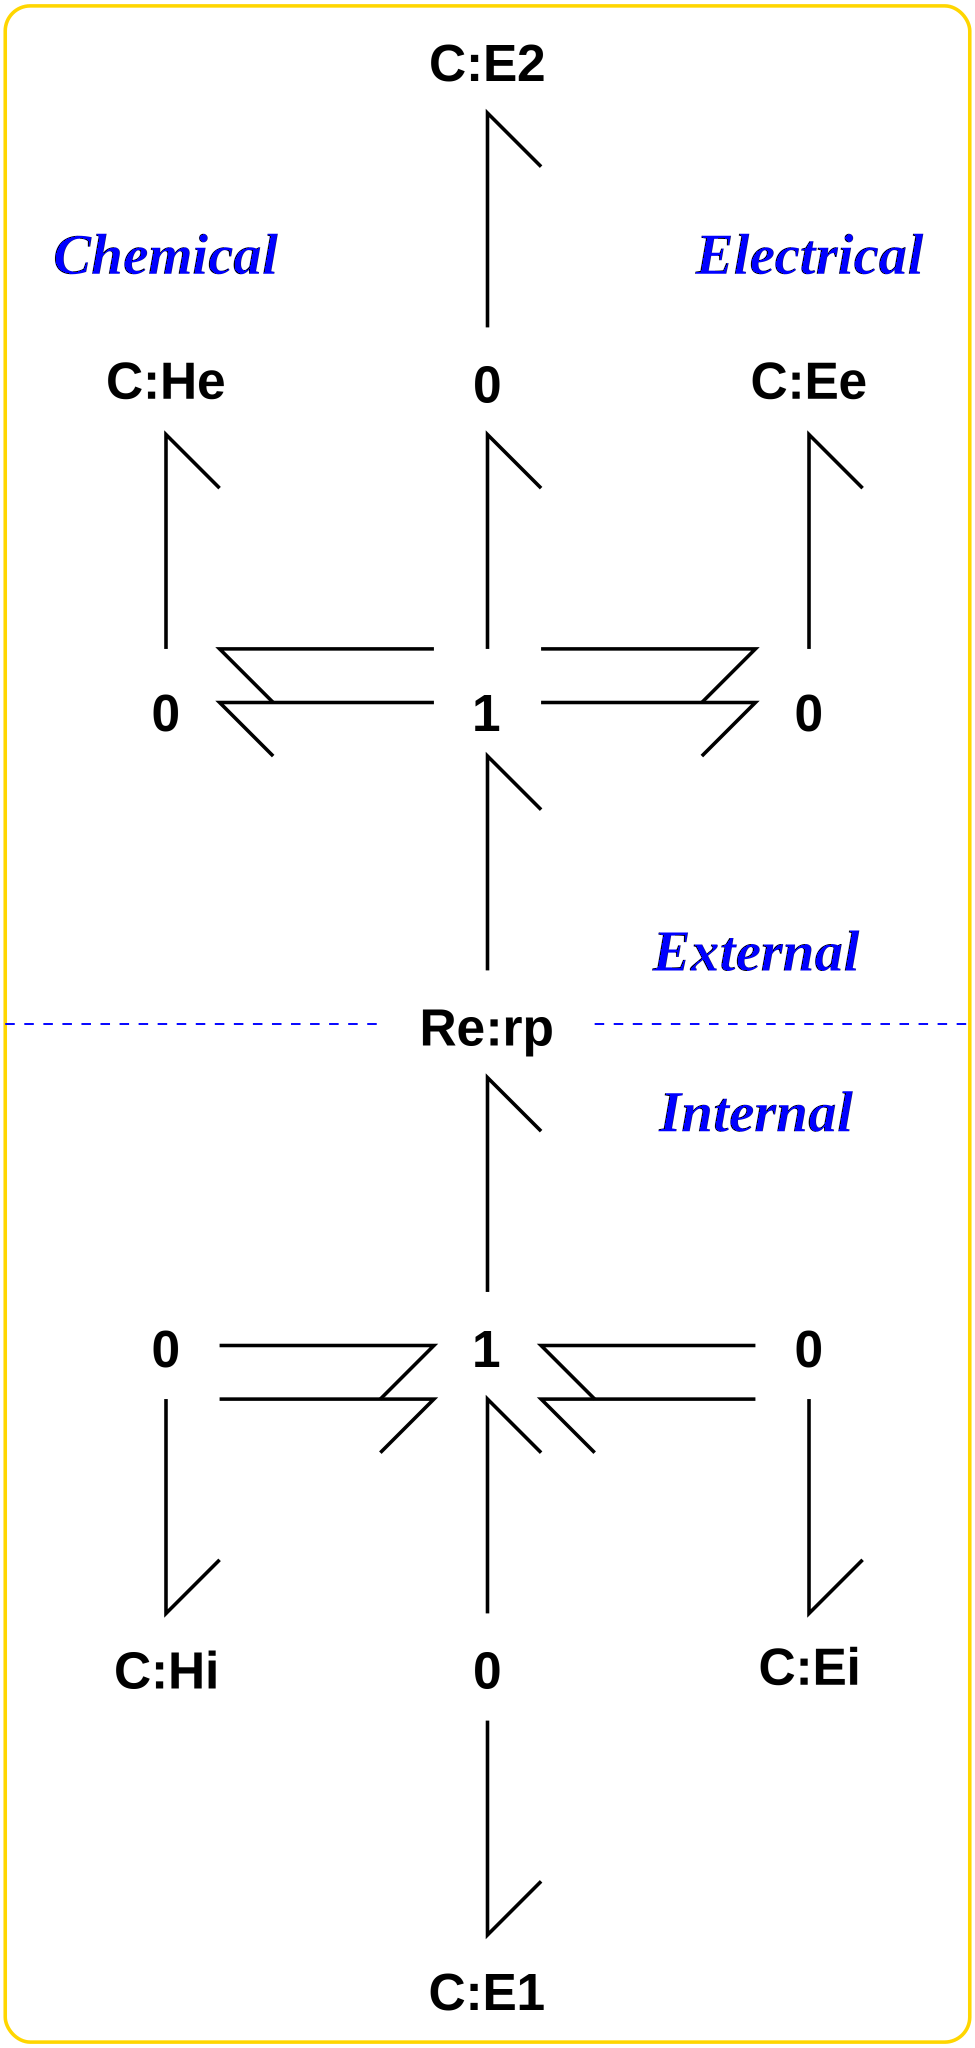

In [7]:
## Proton pump
sbg.model('ProtonPump_abg.svg')
import ProtonPump_abg
disp.SVG('ProtonPump_abg.svg')

## Stoichiometry

In [8]:
## Stoichiometry
linear = ['E1','E2','Ei','Ee']
s = st.stoich(ProtonPump_abg.model(),linear=linear,quiet=quiet)
chemostats = ['E1','E2','Ei','Ee','Hi','He']
sc = st.statify(s,chemostats=chemostats)
#print(s['species'])
#disp.Latex(st.sprint(s0,'K'))
#print(st.sprints(s))

## Reactions
These are automatically generated from the bond graph

In [9]:
## Reactions
disp.Latex(st.sprintrl(s,chemformula=True,all=True))

<IPython.core.display.Latex object>

In [10]:
## Flows
disp.Latex(st.sprintvl(s))

<IPython.core.display.Latex object>

# Complex I
The model of mitochondrial complex I comprides tow modules: the redox reaction and the proton pump. 

Creating subsystem: ProtonPump:pp
Creating subsystem: Redox:rr


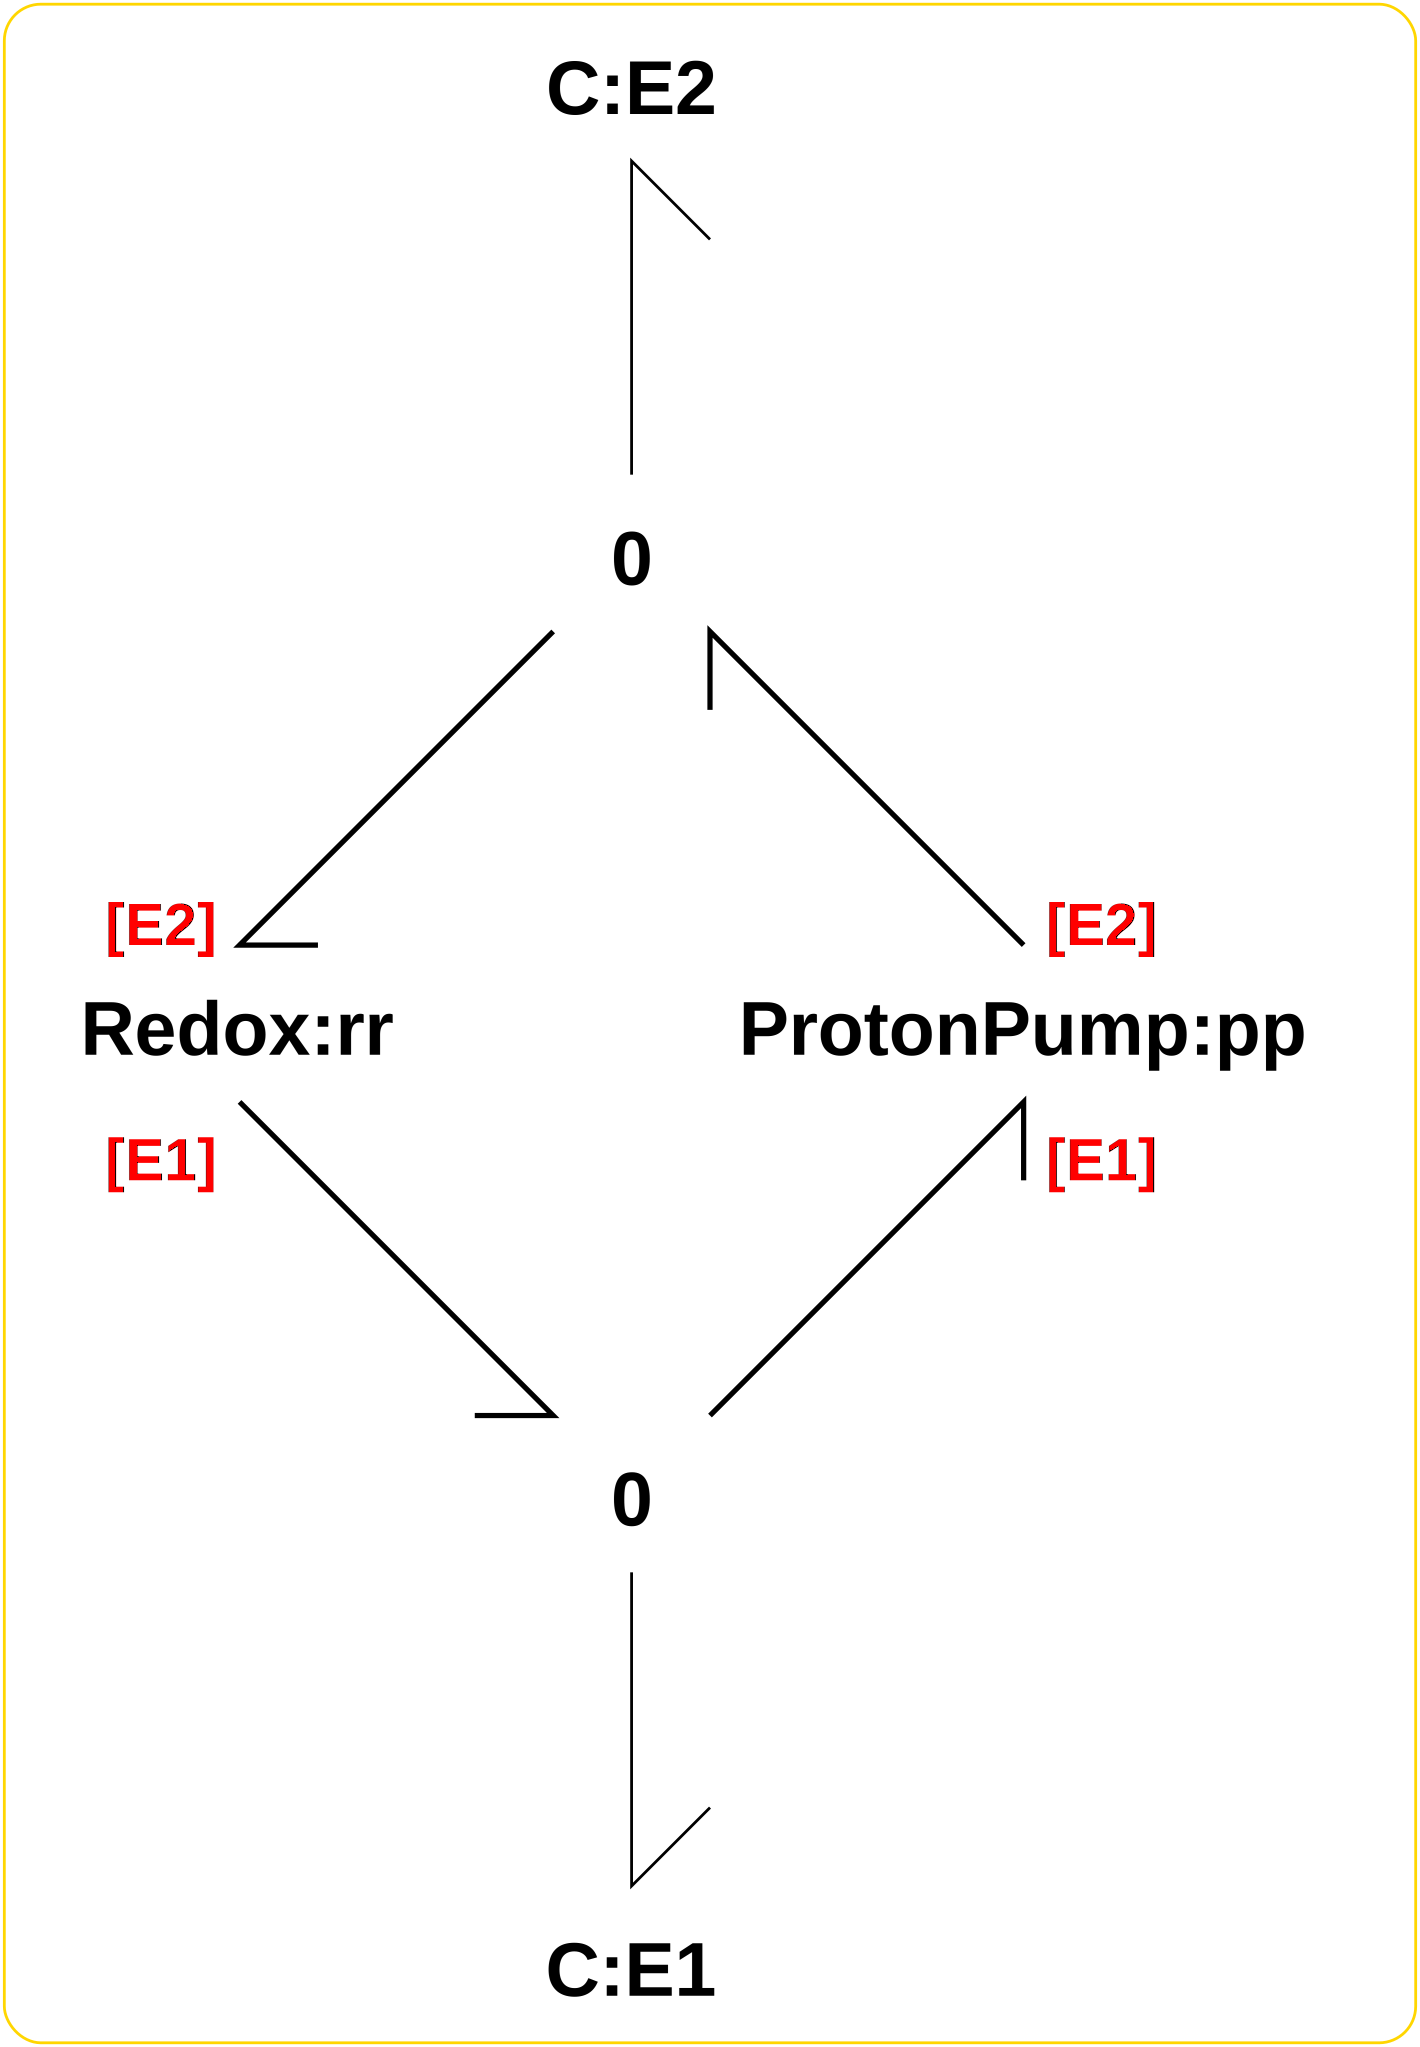

In [11]:
## Complex I
sbg.model('ComplexI_abg.svg')
import ComplexI_abg
disp.SVG('ComplexI_abg.svg')

## Stoichiometry

In [12]:
## Stoichiometry
linear = ['E1','E2','pp_Ei','pp_Ee']
s = st.stoich(ComplexI_abg.model(),linear=linear,quiet=quiet)
print(s['species'])
chemostats = ['pp_Ee', 'pp_Ei', 'pp_He', 'pp_Hi', 'rr_H', 'rr_NAD', 'rr_NADH', 'rr_Q', 'rr_QH2']
sc = st.statify(s,chemostats=chemostats)
#print(s['species'])
#disp.Latex(st.sprint(s0,'K'))
#print(st.sprints(s))

['E1', 'E2', 'pp_Ee', 'pp_Ei', 'pp_He', 'pp_Hi', 'rr_H', 'rr_NAD', 'rr_NADH', 'rr_Q', 'rr_QH2']


## Reactions
These are automatically generated from the bond graph

In [13]:
## Reactions
disp.Latex(st.sprintrl(s,chemformula=True,all=True))

<IPython.core.display.Latex object>

In [14]:
## Flows
disp.Latex(st.sprintvl(s))

<IPython.core.display.Latex object>

In [15]:
## Path
sp = st.path(s,sc)
## Reactions
disp.Latex(st.sprintrl(sp,chemformula=True,all=True))

<IPython.core.display.Latex object>

# Superoxide generation and removal (additional material)
Superoxide is generated from the electron potential of the redox reaction and free oxygen by the reaction:
\ch{  e- +  O2 <>  O2^{.-} }
It is removed by superoxide dismutase in conjunction with glutathione peroxidase. THe bond graph representation of these mechanisms are given below.

## Superoxide dismutase (MnSOD)

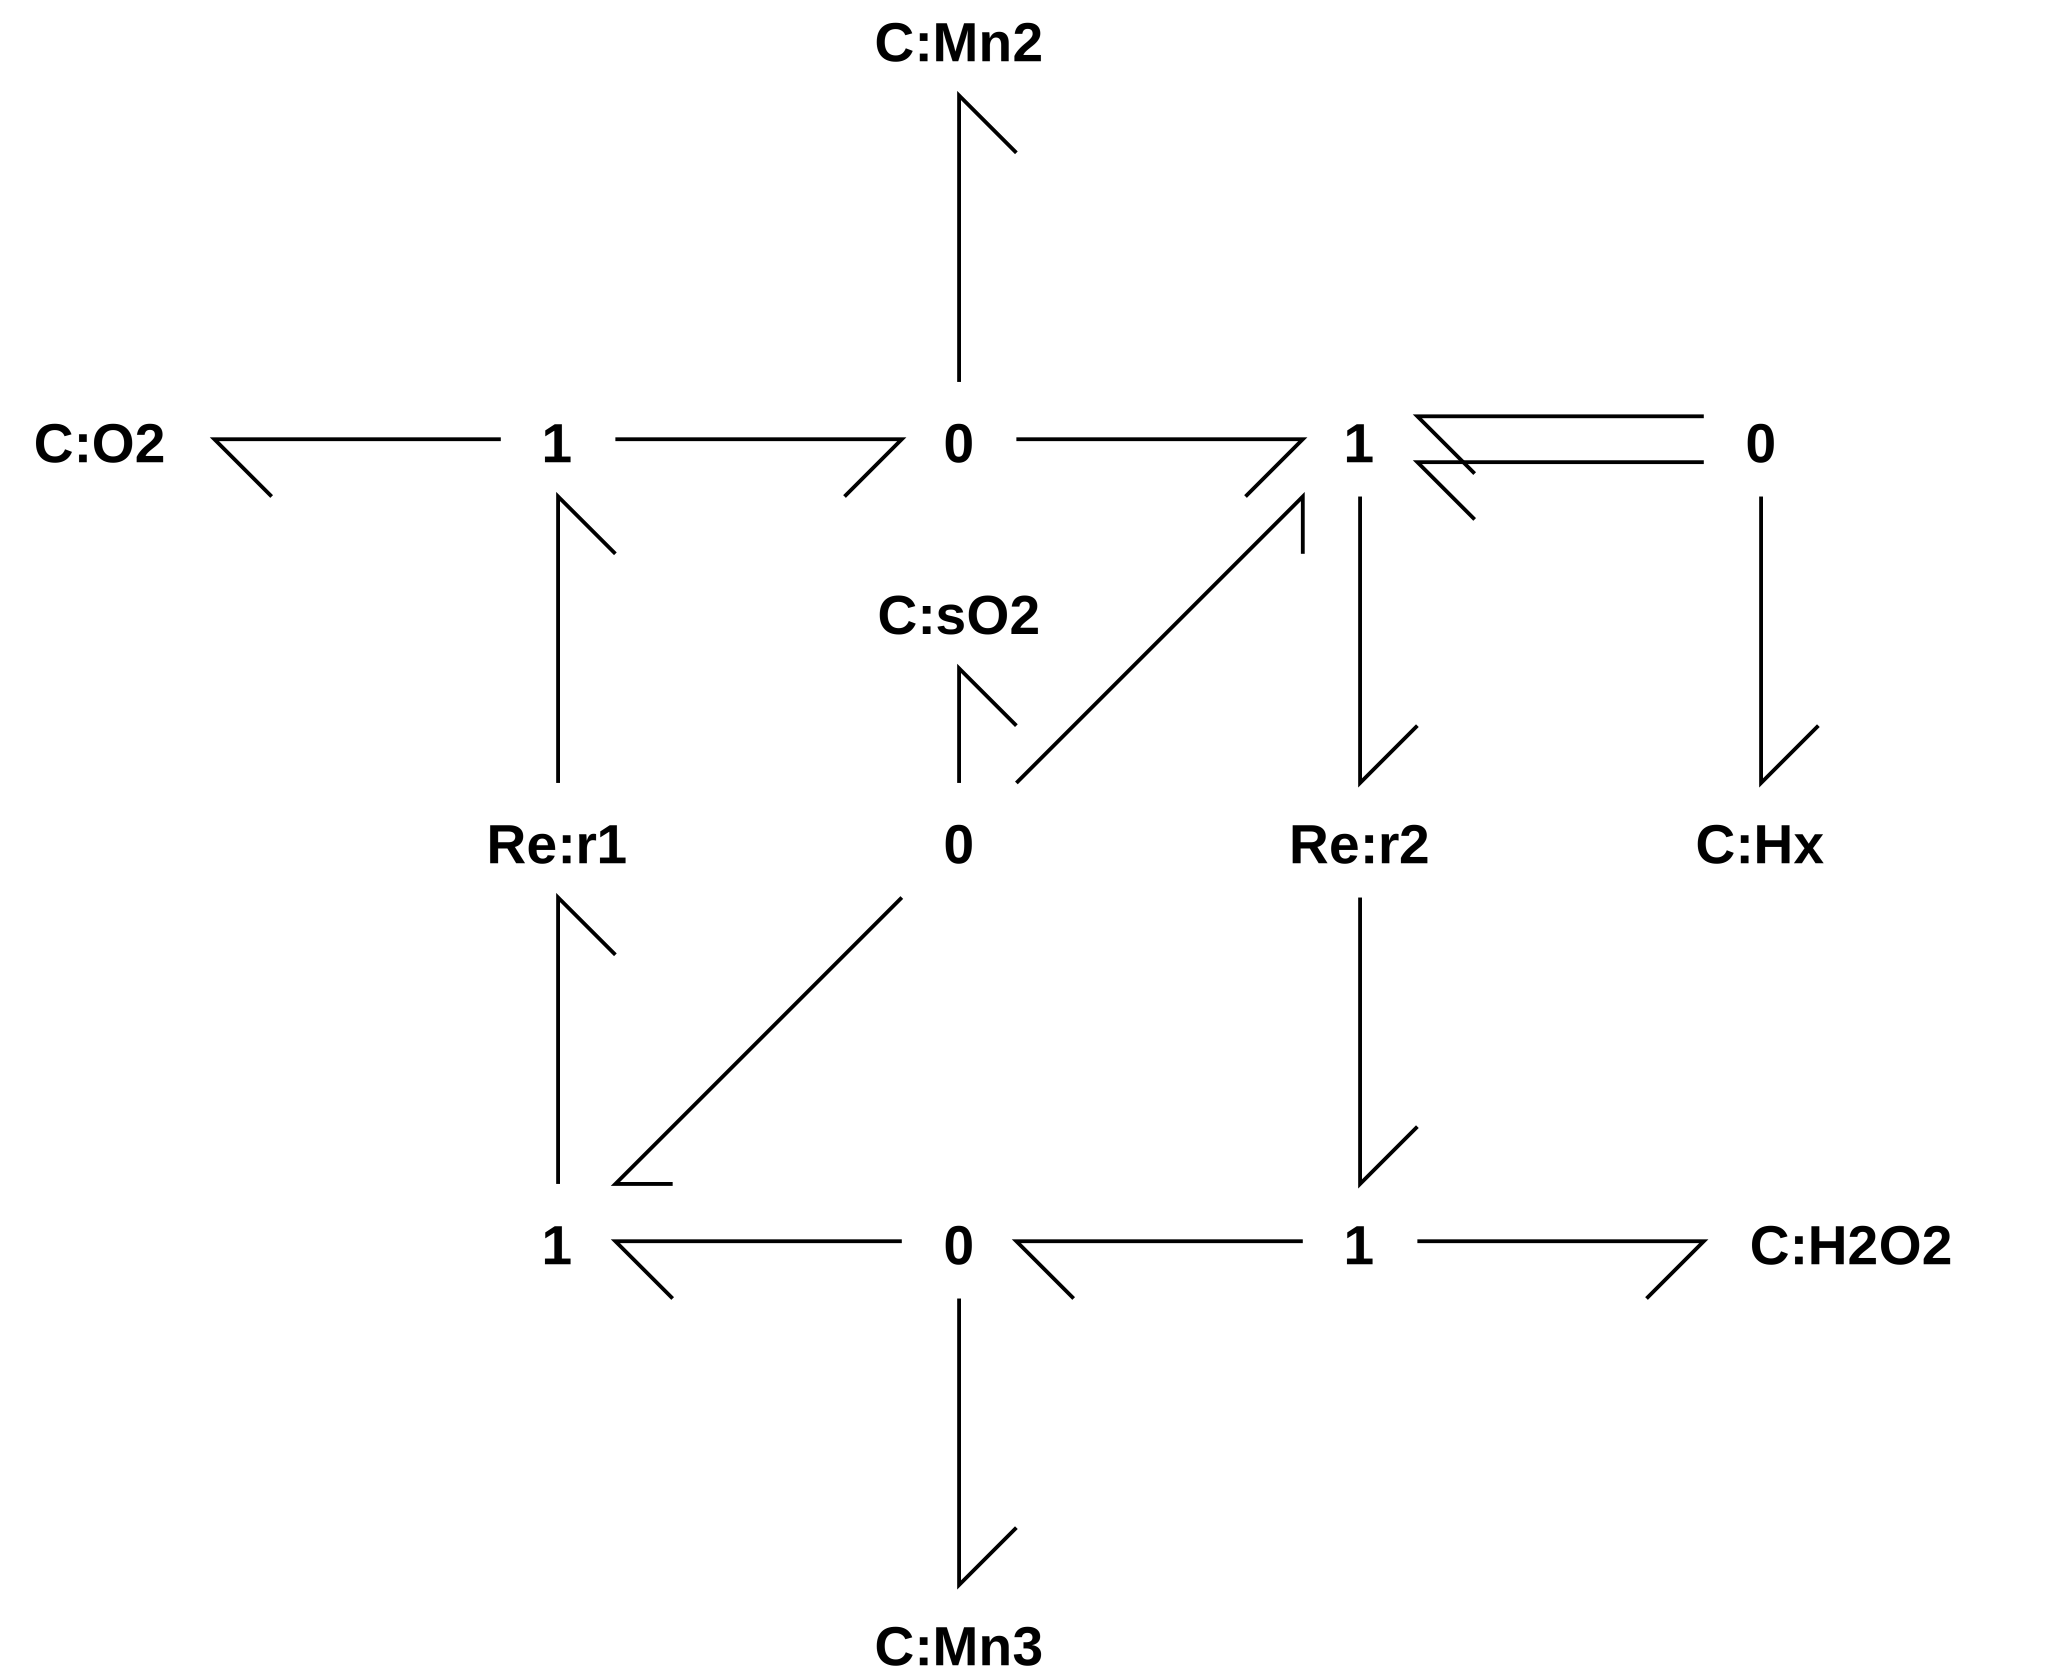

In [16]:
## Complex I
sbg.model('MnSOD_abg.svg')
import MnSOD_abg
disp.SVG('MnSOD_abg.svg')

In [17]:
## Stoichiometry
s = st.stoich(MnSOD_abg.model(),quiet=quiet)
chemostats = ['H2O2', 'Hx', 'O2', 'sO2']
sc = st.statify(s,chemostats=chemostats)
#disp.Latex(st.sprint(s0,'K'))
#print(st.sprints(s))

In [18]:
## Reactions
disp.Latex(st.sprintrl(s,chemformula=True,all=True))

<IPython.core.display.Latex object>

In [19]:
## Flows
disp.Latex(st.sprintvl(s))

<IPython.core.display.Latex object>

In [20]:
sp = st.path(s,sc)
## Reactions
disp.Latex(st.sprintrl(sp,chemformula=True,all=False))

<IPython.core.display.Latex object>

## Glutathione peroxidase (GPx1)

Converting one-port r1 to two-port
Converting one-port r4 to two-port
Converting one-port r2 to two-port
Converting one-port r3 to two-port


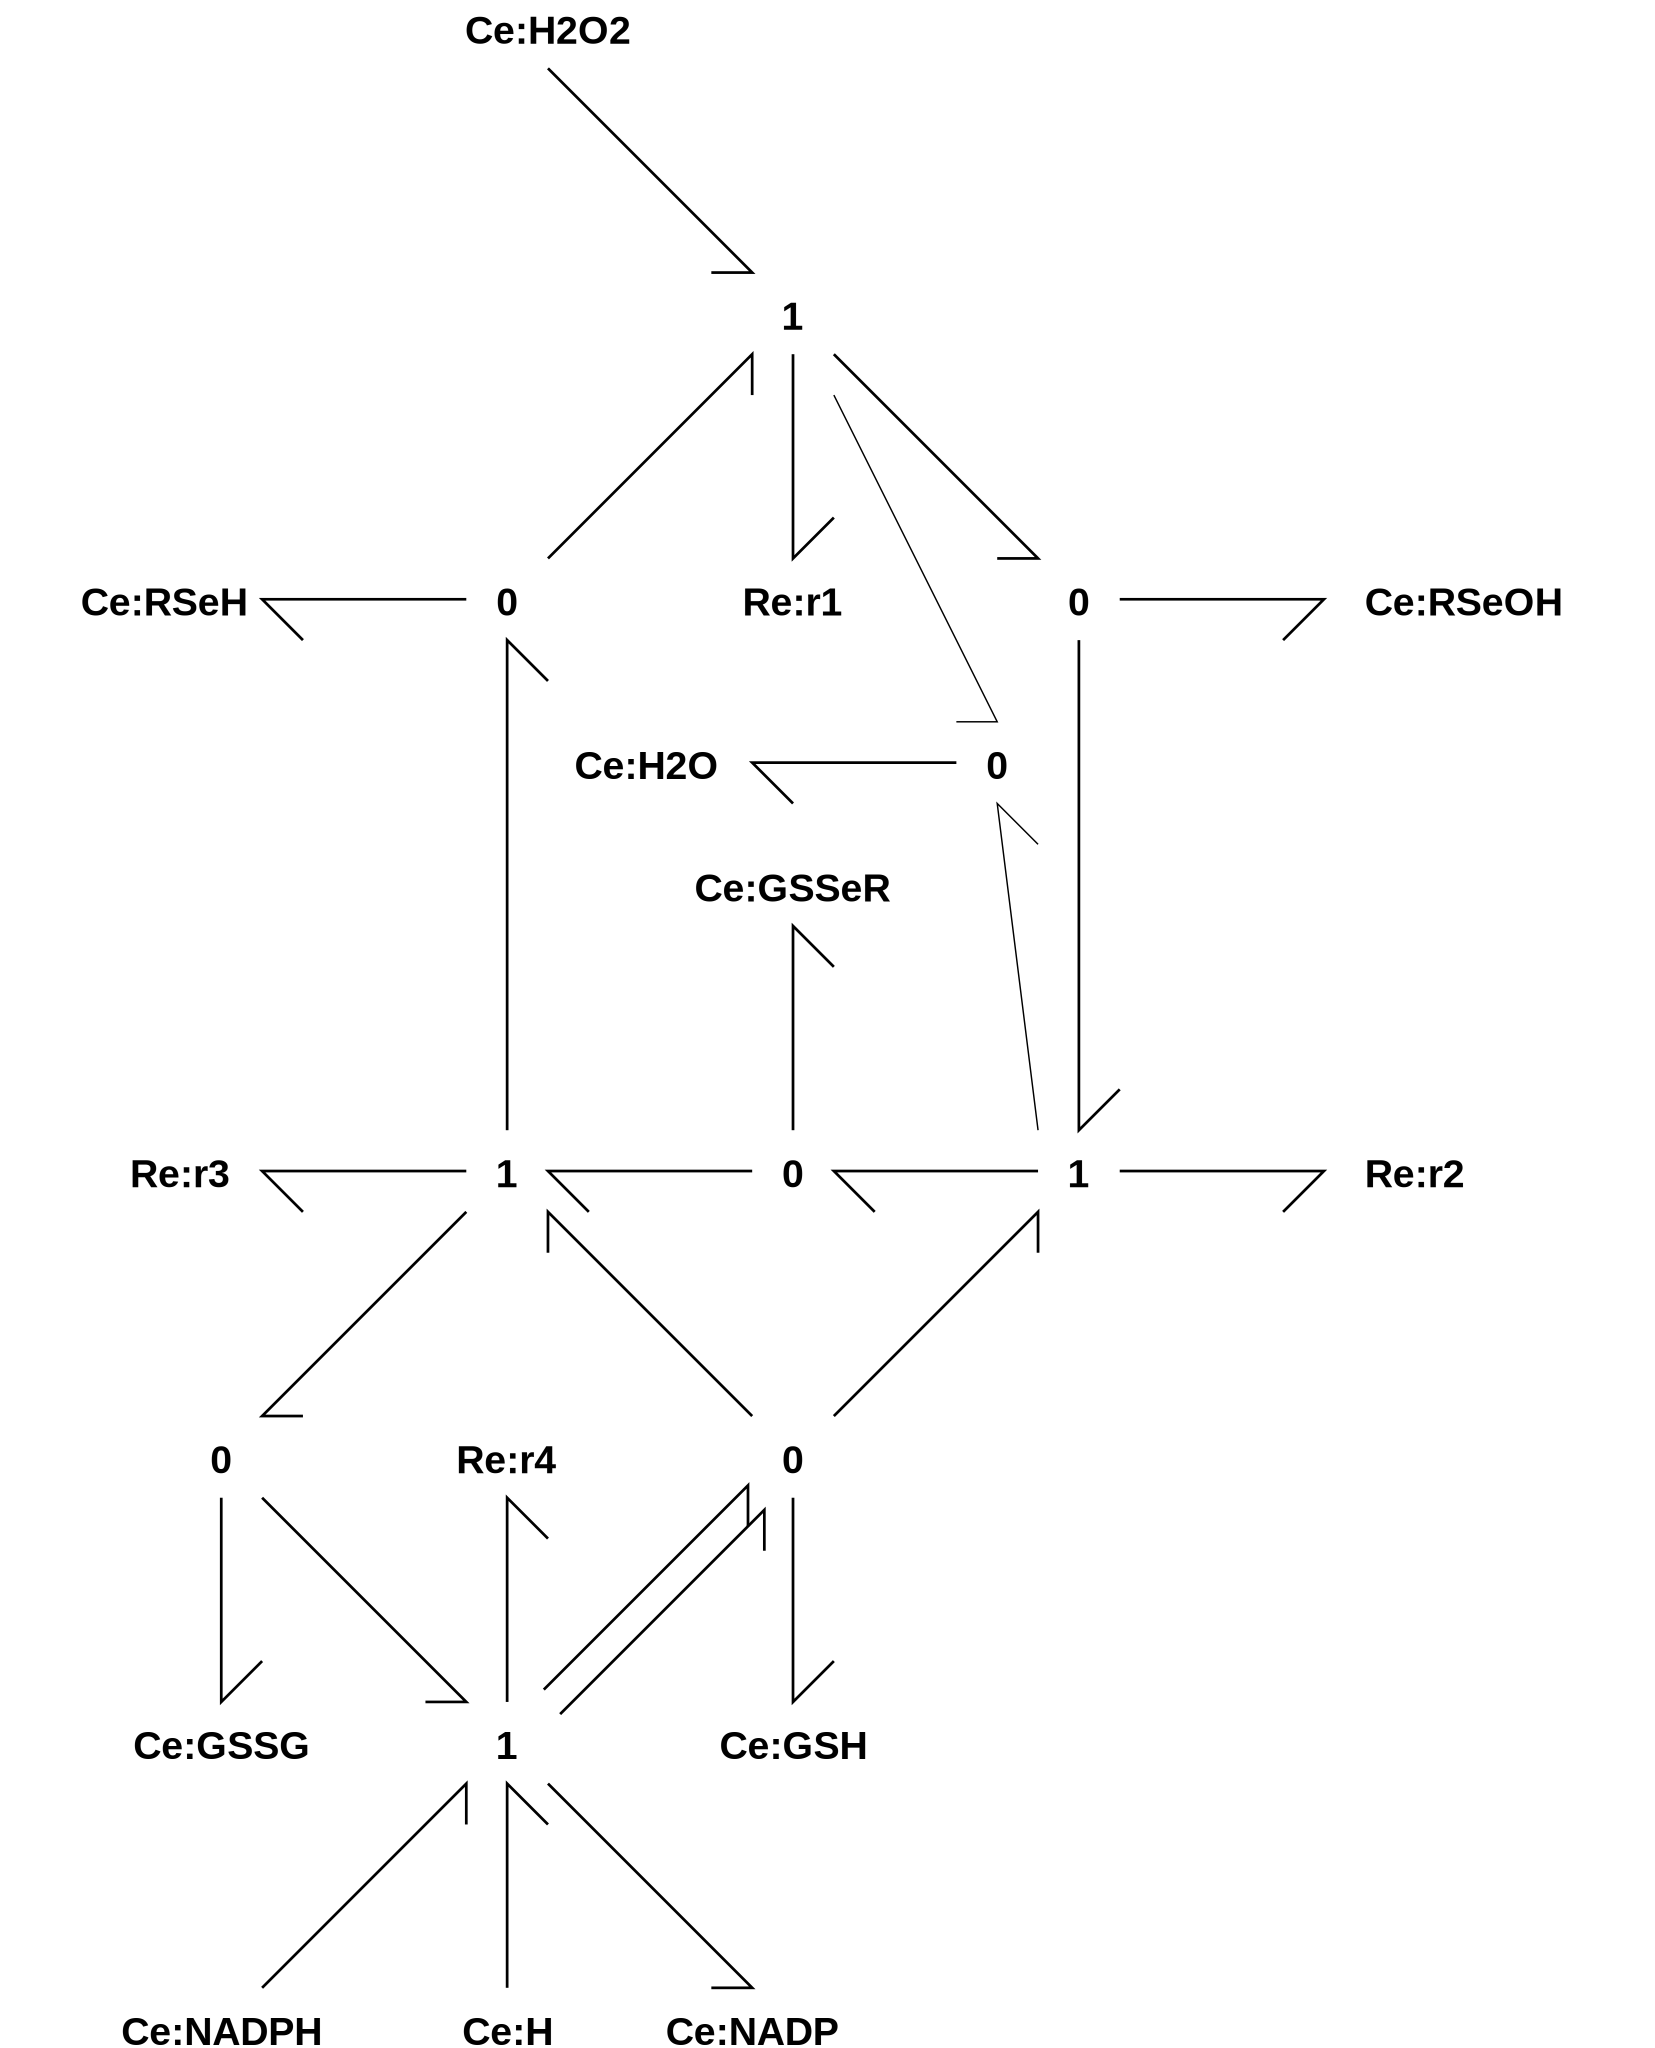

In [21]:
## Complex I
sbg.model('GPx1_abg.svg')
import GPx1_abg
disp.SVG('GPx1_abg.svg')

In [22]:
## Stoichiometry
s = st.stoich(GPx1_abg.model(),quiet=quiet)
#print(s['species'])
chemostats = ['GSH', 'GSSG', 'H', 'H2O', 'H2O2','NADP','NADPH']
sc = st.statify(s,chemostats=chemostats)
#disp.Latex(st.sprint(s0,'K'))
#print(st.sprints(s))

In [23]:
## Reactions
disp.Latex(st.sprintrl(s,chemformula=True,all=True))

<IPython.core.display.Latex object>

In [24]:
## Flows
disp.Latex(st.sprintvl(s))

<IPython.core.display.Latex object>

In [25]:
sp = st.path(s,sc)
## Reactions
disp.Latex(st.sprintrl(sp,chemformula=True,all=True))

<IPython.core.display.Latex object>